<a href="https://colab.research.google.com/github/peter-callahan/vanderbilt/blob/main/Week_8_Homework_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.cs.toronto.edu/~frossard/post/linear_regression/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_ft = pd.read_csv('https://raw.githubusercontent.com/peter-callahan/vanderbilt/main/food_truck_data.txt', header=None, names=['pop', 'profit'])
data_hp = pd.read_csv('https://raw.githubusercontent.com/peter-callahan/vanderbilt/main/housing_price_data.txt', header=None, names=['size', 'bedrm', 'price'])

In [110]:
data_ft = data_ft.sort_values(by='pop')

# Model and Functions

In [106]:
def gd_single_step(training_pair, thetas, x0=1):
    
    x1 = training_pair[0]
    y = training_pair[1]

    # do one forward pass with a single training example
    # to calculate error and gradient
    y_hat = thetas[0] + thetas[1] * x1
    error = y_hat - y

    # for each theta, we need the gradient for an update
    gradients = np.array([error * x0, error * x1])

    # gradients[0] is error term for x0
    # gradients[1] is same for x1
    return gradients


def gradient_descent(training_data, thetas, alpha=5e-3):
    total_error = 0
    overall_gradients = np.zeros(2)

    # compute the summation of gradients across all training examples
    for ex in training_data:
        gradients = gd_single_step(ex, thetas)

        total_error = total_error + gradients[0]
        overall_gradients = overall_gradients + gradients

    # update thetas
    theta_0, theta_1 = thetas
    thetas[0] = theta_0 - alpha * overall_gradients[0]
    thetas[1] = theta_1 - alpha * overall_gradients[1]

    return thetas, total_error

In [107]:
thetas = [0.22, 0.86]

ft_array = np.array(data_ft)

grad = gd_single_step(ft_array[0], thetas, theta1)
grad

array([ 5.0566838 , 36.31349113])

In [108]:
gradient_descent(ft_array, thetas)

([0.17989732, 0.658194585944], 8.020535999999998)

# Training

In [111]:
ft_array_2 = np.array(data_ft)
ft_array_2

array([[ 5.0269, -2.6807],
       [ 5.0365,  5.7014],
       [ 5.0546,  3.8166],
       [ 5.0594,  2.8214],
       [ 5.0702,  5.1337]])

In [112]:
# set initial parameters

thetas = [50, 150]

ft_array_2 = np.array(data_ft)

# ft_array_2 = np.array([[1,6],
#                            [2,5],
#                            [3,7],
#                            [4,10]])

alpha = 5e-3

# prepare training
total_epochs = 100
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(ft_array_2, thetas, alpha)
    # store a history of errors
    error_traj[epoch] = epoch_error

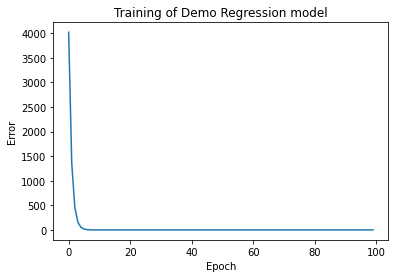

In [113]:
# Let's do an exploratory plot
plt.plot(error_traj)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training of Demo Regression model');